               ki        gtv     status       time
count   88.000000  88.000000  88.000000  88.000000
mean    81.022727   8.660795   0.397727  27.457500
std     10.508866   8.657576   0.492233  20.124412
min     40.000000   0.010000   0.000000   0.070000
25%     80.000000   2.500000   0.000000  10.392500
50%     80.000000   6.510000   0.000000  24.030000
75%     90.000000  12.100000   1.000000  41.597500
max    100.000000  34.640000   1.000000  82.560000


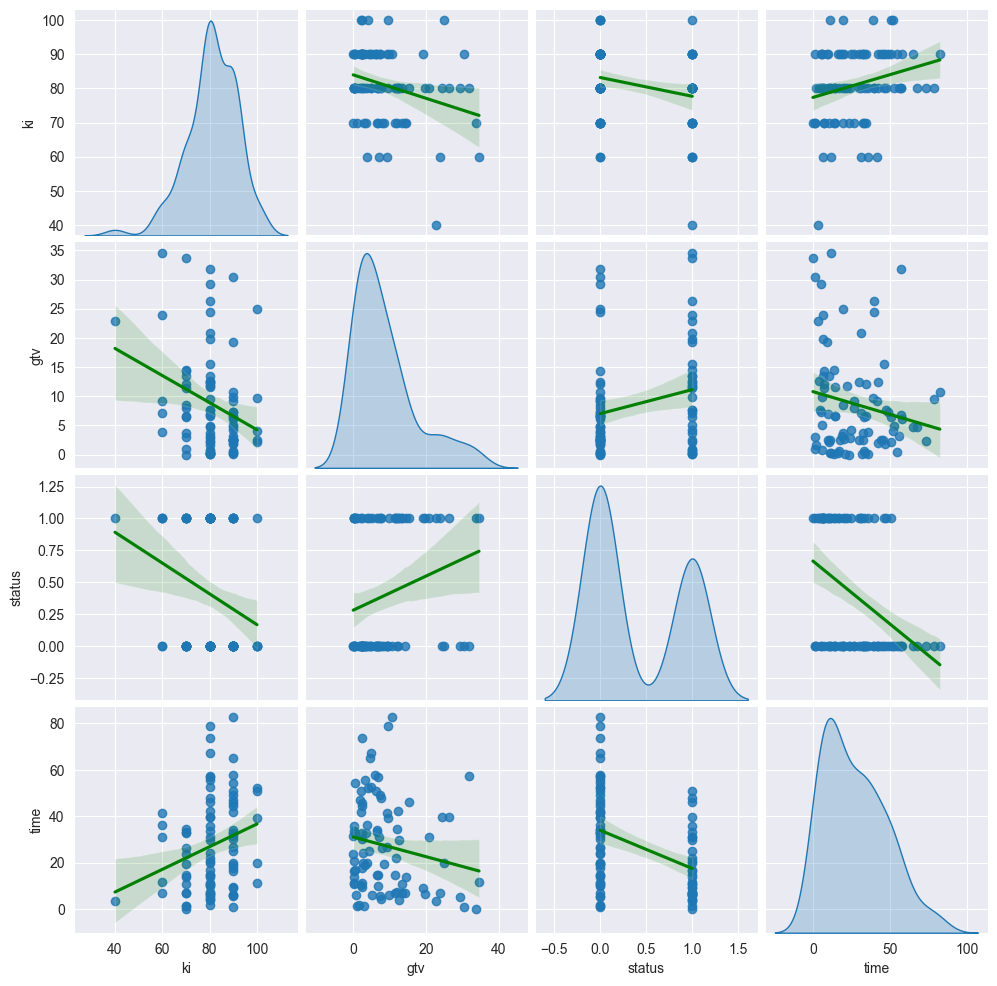

   const     sex   diagnosis             loc  ki    gtv stereo  status   time
0    1.0  Female  Meningioma  Infratentorial  90   6.11    SRS       0  57.64
1    1.0    Male   HG glioma  Supratentorial  90  19.35    SRT       1   8.98
2    1.0  Female  Meningioma  Infratentorial  70   7.95    SRS       0  26.46
3    1.0  Female   LG glioma  Supratentorial  80   7.61    SRT       1  47.80
4    1.0    Male   HG glioma  Supratentorial  90   5.06    SRT       1   6.30
Multiple Linear Regression
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2.600
Date:                Sun, 23 Feb 2025   Prob (F-statistic):             0.0113
Time:                        23:41:16   Log-Likelihood:                -372.38
No. Observations:              

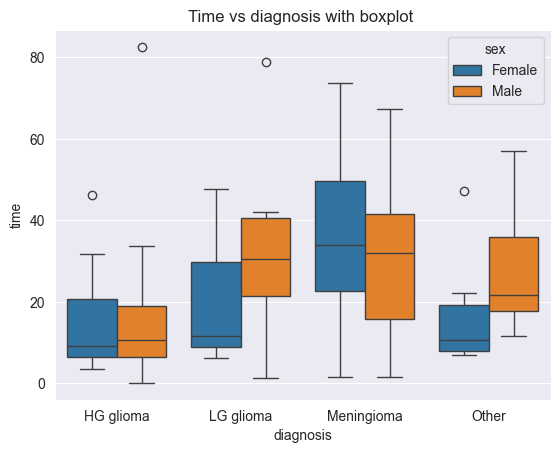

model2 summary
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.026
Date:                Sun, 23 Feb 2025   Prob (F-statistic):            0.00718
Time:                        23:41:16   Log-Likelihood:                -373.59
No. Observations:                  87   AIC:                             763.2
Df Residuals:                      79   BIC:                             782.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

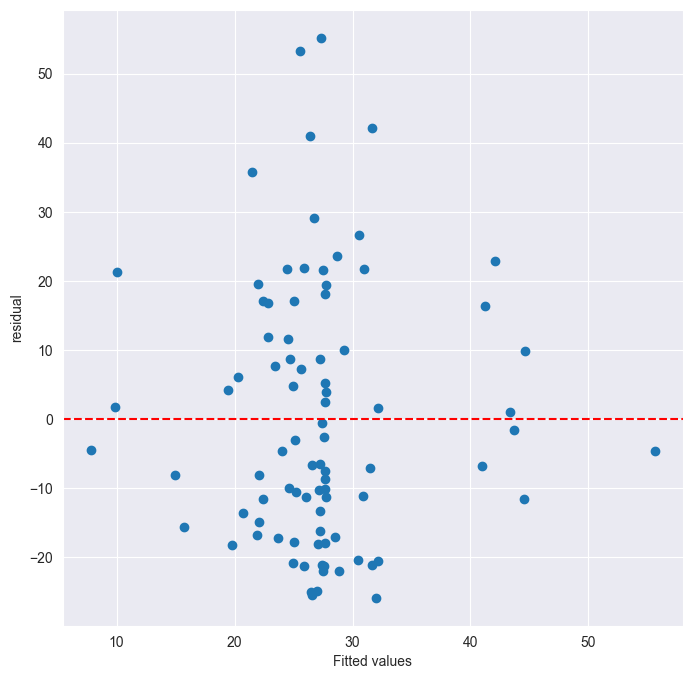

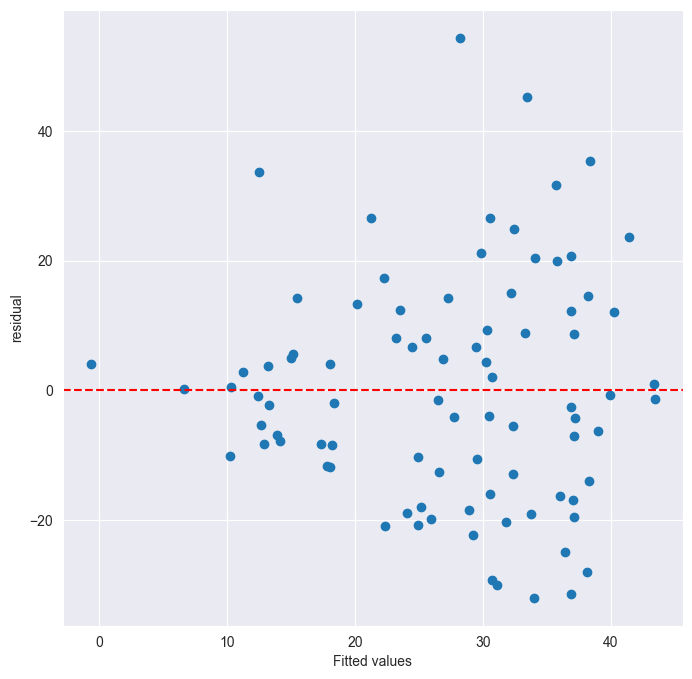

In [28]:
import numpy as np #handle numbers and arrays
import pandas as pd #handle dataset files
import seaborn as sns # used for visualization
import statsmodels.api as sm #for statistical modeling
import matplotlib.pyplot as plt #visualization using plots
import statsmodels.formula.api as smf  #Create an OLS model object
from matplotlib.pyplot import subplots
from sklearn.metrics import mean_squared_error

from statsmodels.formula.api import ols # to fit OLS regression model
#question 1. visualize the relationship
cancer_data = pd.read_csv('BrainCancer.csv', comment="#")
cancer_data.head() #display the first five rows

#clean the data to remove unnecessary columns
#drop unamed column
cancer_data = cancer_data.drop(['Unnamed: 0'], axis=1)

#get the statistics
print(cancer_data.describe())


sns.pairplot(cancer_data, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color':"green"}})
plt.show()
#calculate the intercept
cancer_data =sm.add_constant(cancer_data)
print(cancer_data.head())

#count the occurence of each unique value in diagnosis column
numbers_of_tumor = cancer_data['diagnosis'].value_counts()
#convert to categorical types
categorical_variables = ["diagnosis","sex", "stereo","loc"]
for col in categorical_variables:
    cancer_data[col] = cancer_data[col].astype('category')

cancer_data_clean = cancer_data.dropna()
x = cancer_data_clean.drop(['time'], axis=1)
y = cancer_data_clean.time
y.head()


#create multiple linear regression
#question2.
multiple_variables = smf.ols("time~" + "+".join(x.columns), data=cancer_data_clean).fit()
print("Multiple Linear Regression")
#question 3
print(multiple_variables.summary())
#calculate the mean squared error
y_hat = multiple_variables.predict(x)

mse = mean_squared_error(y, y_hat)
print(f"MSE: {mse}")

#analyzing with residual plot
def residuals_plot(model):
    ax= subplots(figsize=(8,8))[1]
    ax.scatter(model.fittedvalues,model.resid)
    ax.set_xlabel('Fitted values')
    ax.set_ylabel("residual")
    ax.axhline(0,c='red', ls='--')


#question4
#interaction between diagnosis , sex, stereo , and loc
formula = "time~diagnosis + sex + (sex * diagnosis)"
#print("The interaction between sex and diagnosis")
model1= smf.ols(formula, data=cancer_data_clean).fit()
y_hat1 = model1.predict(x)
print("model1 summary")
mse1 = mean_squared_error(y, y_hat1)
print(model1.summary())
print(f"MSE for model 1: {mse1}")

sns.boxplot(data=cancer_data_clean, y="time", x="diagnosis", hue='sex')
plt.title("Time vs diagnosis with boxplot ")
plt.show()

#interaction between  location factors(loc), Gross tumor volume and status
formula2 = "time~loc + gtv + status + (loc * status * gtv)"
model2 = smf.ols(formula2, data=cancer_data_clean).fit()
y_hat2 = model2.predict(x)
#non linear model
print("model2 summary")
mse2 = mean_squared_error(y, y_hat2)
print(model2.summary())
print(f"MSE for model 2: {mse2}")

#interaction between gross tumor volumne, Karnofsky index (KI), and stereotactic method factor
formula3 = "time~gtv + ki + stereo + (gtv * ki * stereo)"
model3 = smf.ols(formula3, data=cancer_data_clean).fit()
y_hat3 = model3.predict(x)
mse3 = mean_squared_error(y, y_hat3)
print("Model 3 summary")
print(model3.summary())
print(f"MSE for model 3: {mse3}")
residuals_plot(model3)
residuals_plot(multiple_variables)
